<a href="https://colab.research.google.com/github/cjfgus983/macineLearningAssignment/blob/main/machineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import pandas as pd

In [27]:
data = pd.read_csv('/content/drive/MyDrive/machineLearning/train_task_3_4.csv')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [29]:
data.groupby('QuestionId')
data

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue
0,898,2111,280203,1,2,2
1,767,3062,55638,1,3,3
2,165,1156,386475,1,2,2
3,490,1653,997498,1,4,4
4,298,3912,578636,1,3,3
...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2
1382723,707,2549,584230,0,2,1
1382724,840,5901,1138956,1,1,1
1382725,794,3854,1151183,0,1,3


In [4]:
for k,df in data.groupby('QuestionId'):
    print(k, len(df), df['IsCorrect'].mean(), df['IsCorrect'].sem())

0 2812 0.44345661450924606 0.00937010933612387
1 14 0.5714285714285714 0.13725270326150324
2 2313 0.3852140077821012 0.01012089927190456
3 2672 0.8087574850299402 0.007609645680958906
4 1704 0.4014084507042254 0.011878216105763999
5 833 0.1908763505402161 0.013624539924512865
6 1718 0.5285215366705471 0.012046950521125473
7 89 0.34831460674157305 0.050788279503341166
8 2327 0.3919209282337774 0.010122188032315155
9 834 0.36330935251798563 0.016664029411268603
10 1572 0.4020356234096692 0.012370345562832941
11 2171 0.45831414094887146 0.010696101386212332
12 1701 0.3991769547325103 0.011877678361556275
13 1259 0.6965845909451946 0.012961803326362887
14 1697 0.6682380671773719 0.01143315150226891
15 4 0.5 0.28867513459481287
16 2300 0.5834782608695652 0.010281623364912649
17 848 0.42924528301886794 0.017007317337094287
18 2173 0.3175333640128854 0.00998861983102292
19 2692 0.6355869242199108 0.009277428244661936
20 1707 0.6338605741066198 0.011663545946428919
21 137 0.40875912408759124 0

In [5]:
# 빈 데이터프레임 생성
result_df = pd.DataFrame(columns=['QuestionId', 'Count', 'MeanCorrect', 'SEMCorrect'])

# 그룹화 및 계산 반복
for k, df in data.groupby('QuestionId'):
    count = len(df)
    mean_correct = df['IsCorrect'].mean()
    sem_correct = df['IsCorrect'].sem()

    # 결과를 데이터프레임에 추가
    result_df = result_df.append({'QuestionId': k, 'Count': count, 'MeanCorrect': mean_correct, 'SEMCorrect': sem_correct},
                                 ignore_index=True)



<ipython-input-5-453c6b9d78ba>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'QuestionId': k, 'Count': count, 'MeanCorrect': mean_correct, 'SEMCorrect': sem_correct},
<ipython-input-5-453c6b9d78ba>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'QuestionId': k, 'Count': count, 'MeanCorrect': mean_correct, 'SEMCorrect': sem_correct},
<ipython-input-5-453c6b9d78ba>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append({'QuestionId': k, 'Count': count, 'MeanCorrect': mean_correct, 'SEMCorrect': sem_correct},
<ipython-input-5-453c6b9d78ba>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [42]:
result_df
result_df.to_csv('./result_df.csv')

result_df

,QuestionId,Count,MeanCorrect,SEMCorrect
0,0.0,2812.0,0.443457,0.009370
1,1.0,14.0,0.571429,0.137253
2,2.0,2313.0,0.385214,0.010121
3,3.0,2672.0,0.808757,0.007610
4,4.0,1704.0,0.401408,0.011878
...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623
944,944.0,189.0,0.142857,0.025521
945,945.0,2337.0,0.422336,0.010220
946,946.0,111.0,0.459459,0.047516


In [44]:
#모델 돌릴 train case
eval_validation = pd.read_csv('/content/drive/MyDrive/machineLearning/quality_response_remapped_public.csv')
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2
5,17,17,56,865,2,1,2,2.0,2
6,27,27,233,478,1,1,1,1.0,2
7,41,41,877,620,2,2,2,2.0,2
8,5,5,246,733,1,1,1,2.0,1
9,35,35,668,741,1,1,1,1.0,1


In [45]:
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score
0,0,0,909,318,2,2,2,1.0,2,1.8
1,16,16,285,609,2,2,2,2.0,2,2.0
2,48,48,132,271,1,2,2,2.0,1,1.6
3,38,38,704,127,2,2,1,2.0,2,1.8
4,33,33,16,586,1,1,2,2.0,2,1.6
5,17,17,56,865,2,1,2,2.0,2,1.8
6,27,27,233,478,1,1,1,1.0,2,1.2
7,41,41,877,620,2,2,2,2.0,2,2.0
8,5,5,246,733,1,1,1,2.0,1,1.2
9,35,35,668,741,1,1,1,1.0,1,1.0


<Axes: >

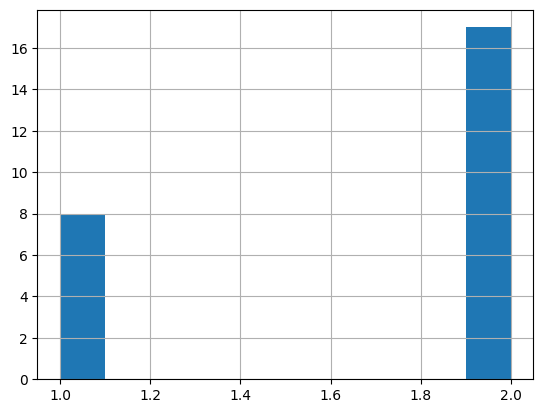

In [46]:
import numpy as np
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2
    
    return list(preference)

eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [47]:
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference
0,0,0,909,318,2,2,2,1.0,2,1.8,2
1,16,16,285,609,2,2,2,2.0,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1,1.6,2
3,38,38,704,127,2,2,1,2.0,2,1.8,2
4,33,33,16,586,1,1,2,2.0,2,1.6,2
5,17,17,56,865,2,1,2,2.0,2,1.8,2
6,27,27,233,478,1,1,1,1.0,2,1.2,1
7,41,41,877,620,2,2,2,2.0,2,2.0,2
8,5,5,246,733,1,1,1,2.0,1,1.2,1
9,35,35,668,741,1,1,1,1.0,1,1.0,1


In [ ]:
eval_validation.at[0,'left_mean'] = 0.5308641975308642 
eval_validation.at[1,'left_mean'] = 0.6514188903007201 
eval_validation.at[2,'left_mean'] =0.38777908343125733 
eval_validation.at[3,'left_mean'] =0.5774811375507836 
eval_validation.at[4,'left_mean'] =0.5834782608695652 
eval_validation.at[5,'left_mean'] =0.5164498852333589 
eval_validation.at[6,'left_mean'] =0.49002302379125096 
eval_validation.at[7,'left_mean'] =0.5142314990512334 
eval_validation.at[8,'left_mean'] =0.3090909090909091 
eval_validation.at[9,'left_mean'] =0.720177232447171
eval_validation.at[10,'left_mean'] =0.655677655677655
eval_validation.at[11,'left_mean'] =0.652292328642759
eval_validation.at[12,'left_mean'] =0.448221343873517
eval_validation.at[13,'left_mean'] =0.777678171223666
eval_validation.at[14,'left_mean'] =0.446584938704028
eval_validation.at[15,'left_mean'] =0.714607585429966
eval_validation.at[16,'left_mean'] = 0.344444444444444
eval_validation.at[17,'left_mean'] = 0.302083333333333
eval_validation.at[18,'left_mean'] = 0.7119341563786
eval_validation.at[19,'left_mean'] = 0.518488745980707
eval_validation.at[20,'left_mean'] = 0.633860574106619
eval_validation.at[21,'left_mean'] = 0.714607585429966
eval_validation.at[22,'left_mean'] = 0.412210338680926
eval_validation.at[23,'left_mean'] = 0.400815217391304
eval_validation.at[24,'left_mean'] = 0.517099863201094
eval_validation

In [ ]:
eval_validation.at[0,'left_sem'] = 0.0112537790972666
eval_validation.at[1,'left_sem'] = 0.00980903076770262
eval_validation.at[2,'left_sem'] =0.0167123225366783
eval_validation.at[3,'left_sem'] =0.0119035192612782
eval_validation.at[4,'left_sem'] =0.0102816233649126
eval_validation.at[5,'left_sem'] =0.00977608869490309
eval_validation.at[6,'left_sem'] =0.00979444121295261
eval_validation.at[7,'left_sem'] =0.01257376876814
eval_validation.at[8,'left_sem'] =0.0129981047489047
eval_validation.at[9,'left_sem'] =0.00828905814517937
eval_validation.at[10,'left_sem'] =0.0101695310672005
eval_validation.at[11,'left_sem'] =0.0101489149819964
eval_validation.at[12,'left_sem'] =0.0139879856554678
eval_validation.at[13,'left_sem'] =0.00880518684344224
eval_validation.at[14,'left_sem'] =0.0120150516785427
eval_validation.at[15,'left_sem'] =0.00875288048060228
eval_validation.at[16,'left_sem'] = 0.0503696971877367
eval_validation.at[17,'left_sem'] = 0.0177257209134347
eval_validation.at[18,'left_sem'] = 0.00876087675902705
eval_validation.at[19,'left_sem'] = 0.0100192449771611
eval_validation.at[20,'left_sem'] = 0.00921020686621976
eval_validation.at[21,'left_sem'] = 0.00875288048060228
eval_validation.at[22,'left_sem'] = 0.0103933553176761
eval_validation.at[23,'left_sem'] = 0.0104316095149519
eval_validation.at[24,'left_sem'] = 0.00924275556905181
eval_validation.at[0,'left_cnt'] = 1682
eval_validation.at[1,'left_cnt'] = 2361
eval_validation.at[2,'left_cnt'] = 851
eval_validation.at[3,'left_cnt'] = 1723
eval_validation.at[4,'left_cnt'] = 2300
eval_validation.at[5,'left_cnt'] = 2614
eval_validation.at[6,'left_cnt'] = 2606
eval_validation.at[7,'left_cnt'] = 1581
eval_validation.at[8,'left_cnt'] = 1265
eval_validation.at[9,'left_cnt'] =2934
eval_validation.at[10,'left_cnt'] =2184
eval_validation.at[11,'left_cnt'] =2203
eval_validation.at[12,'left_cnt'] =1265
eval_validation.at[13,'left_cnt'] =2231
eval_validation.at[14,'left_cnt'] =1713
eval_validation.at[15,'left_cnt'] =2663
eval_validation.at[16,'left_cnt'] =90
eval_validation.at[17,'left_cnt'] =672
eval_validation.at[18,'left_cnt'] =2673
eval_validation.at[19,'left_cnt'] =2488
eval_validation.at[20,'left_cnt'] =2878
eval_validation.at[21,'left_cnt'] =2663
eval_validation.at[22,'left_cnt'] =2244
eval_validation.at[23,'left_cnt'] =2208
eval_validation.at[24,'left_cnt'] =2924
eval_validation

In [51]:
eval_validation.at[0,'right_mean'] = 0.512820512820512
eval_validation.at[1,'right_mean'] = 0.452664576802507
eval_validation.at[2,'right_mean'] =0.387486278814489
eval_validation.at[3,'right_mean'] =0.431192660550458
eval_validation.at[4,'right_mean'] =0.246760895170789
eval_validation.at[5,'right_mean'] =0.297435897435897
eval_validation.at[6,'right_mean'] =0.601036269430051
eval_validation.at[7,'right_mean'] =0.423167848699763
eval_validation.at[8,'right_mean'] =0.847058823529411
eval_validation.at[9,'right_mean'] =0.711145996860282
eval_validation.at[10,'right_mean'] =0.401408450704225
eval_validation.at[11,'right_mean'] =0.513130471029595
eval_validation.at[12,'right_mean'] =0.451696006869901
eval_validation.at[13,'right_mean'] =0.404580152671755
eval_validation.at[14,'right_mean'] =0.774281805745554
eval_validation.at[15,'right_mean'] =0.379746835443038
eval_validation.at[16,'right_mean'] = 0.466666666666666
eval_validation.at[17,'right_mean'] = 0.359281437125748
eval_validation.at[18,'right_mean'] = 0.394321766561514
eval_validation.at[19,'right_mean'] = 0.532516493873704
eval_validation.at[20,'right_mean'] = 0.75
eval_validation.at[21,'right_mean'] = 0.479627989371124
eval_validation.at[22,'right_mean'] = 0.604526503871352
eval_validation.at[23,'right_mean'] = 0.333333333333333
eval_validation.at[24,'right_mean'] = 0.577777777777777
eval_validation.at[0,'right_sem'] = 0.0569615539573317
eval_validation.at[1,'right_sem'] = 0.0124672559263434
eval_validation.at[2,'right_sem'] =0.0161497342047664
eval_validation.at[3,'right_sem'] =0.0476547722181684
eval_validation.at[4,'right_sem'] =0.01046558903226
eval_validation.at[5,'right_sem'] =0.0189161716144845
eval_validation.at[6,'right_sem'] =0.035339990940657
eval_validation.at[7,'right_sem'] =0.0169962341992139
eval_validation.at[8,'right_sem'] =0.0392716687245308
eval_validation.at[9,'right_sem'] =0.0179717356711698
eval_validation.at[10,'right_sem'] =0.0118782161057639
eval_validation.at[11,'right_sem'] =0.010206941143685
eval_validation.at[12,'right_sem'] =0.0103143613439986
eval_validation.at[13,'right_sem'] =0.00914412830829267
eval_validation.at[14,'right_sem'] =0.00773247283694691
eval_validation.at[15,'right_sem'] =0.0549520976028138
eval_validation.at[16,'right_sem'] = 0.0528819853025401
eval_validation.at[17,'right_sem'] = 0.0372389132901021
eval_validation.at[18,'right_sem'] = 0.0274917773079239
eval_validation.at[19,'right_sem'] = 0.0108337633315342
eval_validation.at[20,'right_sem'] = 0.25
eval_validation.at[21,'right_sem'] = 0.0105158272843813
eval_validation.at[22,'right_sem'] = 0.0119363181631637
eval_validation.at[23,'right_sem'] = 0.210818510677892
eval_validation.at[24,'right_sem'] = 0.0523547339954065
eval_validation.at[0,'right_cnt'] = 78
eval_validation.at[1,'right_cnt'] = 1595
eval_validation.at[2,'right_cnt'] = 911
eval_validation.at[3,'right_cnt'] = 109
eval_validation.at[4,'right_cnt'] = 1698
eval_validation.at[5,'right_cnt'] = 585
eval_validation.at[6,'right_cnt'] = 193
eval_validation.at[7,'right_cnt'] = 846
eval_validation.at[8,'right_cnt'] = 85
eval_validation.at[9,'right_cnt'] = 637
eval_validation.at[10,'right_cnt'] =1704
eval_validation.at[11,'right_cnt'] =2399
eval_validation.at[12,'right_cnt'] =2329
eval_validation.at[13,'right_cnt'] =2882
eval_validation.at[14,'right_cnt'] =2924
eval_validation.at[15,'right_cnt'] =79
eval_validation.at[16,'right_cnt'] =90
eval_validation.at[17,'right_cnt'] =167
eval_validation.at[18,'right_cnt'] =317
eval_validation.at[19,'right_cnt'] =2122
eval_validation.at[20,'right_cnt'] =4
eval_validation.at[21,'right_cnt'] =2258
eval_validation.at[22,'right_cnt'] =1679
eval_validation.at[23,'right_cnt'] =6
eval_validation.at[24,'right_cnt'] =90

In [52]:
eval_validation

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,score,preference,left_mean,left_sem,left_cnt,right_mean,right_sem,right_cnt
0,0,0,909,318,2,2,2,1.0,2,1.8,2,0.530864,0.011254,1682.0,0.512821,0.056962,78.0
1,16,16,285,609,2,2,2,2.0,2,2.0,2,0.651419,0.009809,2361.0,0.452665,0.012467,1595.0
2,48,48,132,271,1,2,2,2.0,1,1.6,2,0.387779,0.016712,851.0,0.387486,0.016150,911.0
3,38,38,704,127,2,2,1,2.0,2,1.8,2,0.577481,0.011904,1723.0,0.431193,0.047655,109.0
4,33,33,16,586,1,1,2,2.0,2,1.6,2,0.583478,0.010282,2300.0,0.246761,0.010466,1698.0
5,17,17,56,865,2,1,2,2.0,2,1.8,2,0.516450,0.009776,2614.0,0.297436,0.018916,585.0
6,27,27,233,478,1,1,1,1.0,2,1.2,1,0.490023,0.009794,2606.0,0.601036,0.035340,193.0
7,41,41,877,620,2,2,2,2.0,2,2.0,2,0.514231,0.012574,1581.0,0.423168,0.016996,846.0
8,5,5,246,733,1,1,1,2.0,1,1.2,1,0.309091,0.012998,1265.0,0.847059,0.039272,85.0
9,35,35,668,741,1,1,1,1.0,1,1.0,1,0.720177,0.008289,2934.0,0.711146,0.017972,637.0


In [56]:
from sklearn.linear_model import LogisticRegression

# 데이터셋 로드
data = eval_validation

# 특성과 목표 변수 분할
features = data[['left_mean',	'left_sem',	'left_cnt',	'right_mean',	'right_sem',	'right_cnt']]
target = data['preference']

# 선형 회귀 모델 초기화
model = LogisticRegression()

# 모델 훈련
model.fit(features, target)
#임시로 한번 넣어보기
new_data = pd.DataFrame({'left_mean': [0.1 , 0.8, 0.2],'left_sem':[0.00874412302206565, 0.0139723116587886, 0.0367171308238985],'left_cnt' : [2633.0,181.0,846.0 ], 'right_mean': [0.9 , 0.7, 0.9], 'right_sem':[0.019553340715859,0.244948974278317, 0.0114772514658278], 'right_cnt' : [79.0, 1032.0, 617.0] })

# 테스트 세트에 대한 예측
predictions = model.predict(new_data)

# 예측 결과 출력
print(predictions)


[1 2 2]


In [161]:
#점수 매길 배열 0으로 초기화
arr = []
for i in range(0,948):
  arr.append(0)

In [106]:
result_df.at[0, 'MeanCorrect']

0.44345661450924606

In [142]:
result_df

,QuestionId,Count,MeanCorrect,SEMCorrect
0,0.0,2812.0,0.443457,0.009370
1,1.0,14.0,0.571429,0.137253
2,2.0,2313.0,0.385214,0.010121
3,3.0,2672.0,0.808757,0.007610
4,4.0,1704.0,0.401408,0.011878
...,...,...,...,...
943,943.0,2653.0,0.566528,0.009623
944,944.0,189.0,0.142857,0.025521
945,945.0,2337.0,0.422336,0.010220
946,946.0,111.0,0.459459,0.047516


In [162]:
result_df
#이중 반복을 돌면서 비교
for i in range(0,947):
  for j in range(i+1, 948):
    newdata = pd.DataFrame({'left_mean' : [result_df.at[i, 'MeanCorrect']], 'left_sem' : [result_df.at[i, 'SEMCorrect']], 'left_cnt' : [result_df.at[i, 'Count']], 'right_mean' : [result_df.at[j, 'MeanCorrect']], 'right_sem' : [result_df.at[j, 'SEMCorrect']], 'right_cnt' : [result_df.at[j, 'Count']]})
    prediction = model.predict(newdata)
    if(prediction == 1):#왼쪽이 이기면
      arr[i] = arr[i]+1
      arr[j] = arr[j]-1
    else:#오른쪽이 이기면
      arr[j] = arr[j]+1
      arr[i] = arr[i]-1


In [163]:
for i in range(0,948):
  print(arr[i])

-207
-947
-797
-625
-939
-937
-935
-935
-775
-929
-927
-889
-923
-923
-919
-925
-857
-915
-851
-431
-907
-909
-289
-905
-793
-843
-895
-767
-899
-889
-197
-851
-893
-889
-769
-887
-877
-827
-605
-387
-329
-867
-875
-895
-807
-321
-323
-149
-851
-369
-119
-845
-637
-727
-801
-837
-389
-857
-859
-661
-851
-835
-831
-821
-807
-281
-815
-831
-829
-363
-807
-375
-781
-845
-807
-417
-709
-801
-791
-789
-463
-825
-611
-55
-257
-777
-763
-773
-707
-79
-565
-49
-677
-565
-759
-757
-799
-765
-797
-795
-829
-309
-789
-627
-755
-737
-713
-777
-775
-777
-727
-433
-763
-779
-773
-765
-693
-755
-475
-457
-667
-745
-689
-667
-699
-701
-721
-743
-721
-633
-687
-739
-689
-639
-285
-677
-719
-687
-513
-717
-711
-721
-317
-89
-719
-607
-655
-615
-375
-693
-453
-689
-643
-771
-615
-637
-663
-633
-579
-593
-593
-201
-623
-703
-743
-565
-661
-613
-725
-431
-609
-585
-613
-647
-599
-647
-609
-287
-95
-625
-617
-599
-463
-197
-411
-175
-435
-539
-627
-621
-313
-565
-593
-499
-559
-373
-555
-511
-611
39
-565
-5

In [164]:
#동점일 경우 처리 해야 하는데....
for repeat in range(9): #9번 정도 돌리면 중복 없어지나
  for i in range(0,947):
    for j in range(i+1, 948):
      if(arr[i] == arr[j]):#동점이라면
        newdata2 = pd.DataFrame({'left_mean' : [result_df.at[i, 'MeanCorrect']], 'left_sem' : [result_df.at[i, 'SEMCorrect']], 'left_cnt' : [result_df.at[i, 'Count']], 'right_mean' : [result_df.at[j, 'MeanCorrect']], 'right_sem' : [result_df.at[j, 'SEMCorrect']], 'right_cnt' : [result_df.at[j, 'Count']]})
        prediction = model.predict(newdata2)
        if(prediction == 1):#왼쪽이 이기면
          arr[i] = arr[i]+0.001
          arr[j] = arr[j]-0.001
        else:#오른쪽이 이기면
          arr[j] = arr[j]+0.001
          arr[i] = arr[i]-0.001


In [166]:
for i in range(0,948):
  print(arr[i])

-207
-947
-797.001
-625.001
-939
-937
-935.001
-934.999
-775.001
-929
-927
-889.001
-923.001
-922.999
-919
-925
-857.001
-915
-851.002
-431.001
-907
-909
-289
-905
-793
-843
-895.001
-767
-899
-888.999
-197.001
-851.001
-893
-889
-769
-887
-877
-827
-605
-387.001
-328.999
-867
-875
-894.999
-807.002
-321.001
-323.001
-149.001
-850.999
-369
-119
-845.001
-637.001
-727.001
-801.001
-837
-389
-856.999
-859
-661.001
-850.998
-835
-831.001
-821
-807.001
-281
-815
-830.999
-829.001
-363.001
-806.999
-375.001
-781
-844.999
-806.998
-417
-709
-800.999
-791
-789.001
-463.001
-825
-611.001
-54.999
-257.001
-777.001
-763.001
-773.001
-707
-79.001
-565.002
-49
-677.001
-565.001
-759
-757
-799
-765.001
-796.999
-795
-828.999
-309.001
-788.999
-627.001
-755.001
-737
-713
-776.999
-774.999
-777
-726.999
-433.001
-762.999
-779
-772.999
-764.999
-693.001
-754.999
-475
-457
-667.001
-745
-689.001
-666.999
-699
-701
-721.001
-743.001
-720.999
-633.001
-687.001
-739
-688.999
-639
-285
-676.999
-719.001
-6

In [169]:
for i in range(0,947):
    for j in range(i+1, 948):
      if(arr[i] == arr[j]):#아직도 동점이 있으면
        print("동점있음") # 동점 없는것 확인 

In [170]:
arr

[-207,
 -947,
 -797.001,
 -625.001,
 -939,
 -937,
 -935.001,
 -934.999,
 -775.001,
 -929,
 -927,
 -889.001,
 -923.001,
 -922.999,
 -919,
 -925,
 -857.001,
 -915,
 -851.002,
 -431.001,
 -907,
 -909,
 -289,
 -905,
 -793,
 -843,
 -895.001,
 -767,
 -899,
 -888.999,
 -197.001,
 -851.001,
 -893,
 -889,
 -769,
 -887,
 -877,
 -827,
 -605,
 -387.001,
 -328.999,
 -867,
 -875,
 -894.999,
 -807.002,
 -321.001,
 -323.001,
 -149.001,
 -850.999,
 -369,
 -119,
 -845.001,
 -637.001,
 -727.001,
 -801.001,
 -837,
 -389,
 -856.999,
 -859,
 -661.001,
 -850.998,
 -835,
 -831.001,
 -821,
 -807.001,
 -281,
 -815,
 -830.999,
 -829.001,
 -363.001,
 -806.999,
 -375.001,
 -781,
 -844.999,
 -806.998,
 -417,
 -709,
 -800.999,
 -791,
 -789.001,
 -463.001,
 -825,
 -611.001,
 -54.999,
 -257.001,
 -777.001,
 -763.001,
 -773.001,
 -707,
 -79.001,
 -565.002,
 -49,
 -677.001,
 -565.001,
 -759,
 -757,
 -799,
 -765.001,
 -796.999,
 -795,
 -828.999,
 -309.001,
 -788.999,
 -627.001,
 -755.001,
 -737,
 -713,
 -776.999,
 -774.9

In [187]:
score_df = pd.DataFrame(arr)
score_df.rename(columns={0:'score'}, inplace = True)
score_df

,score
0,-207.000
1,-947.000
2,-797.001
3,-625.001
4,-939.000
...,...
943,942.999
944,877.000
945,943.001
946,560.999


In [188]:
ranked_array = score_df['score'].rank(ascending=False, method='min')
ranked_array

0      598.0
1      948.0
2      895.0
3      822.0
4      947.0
       ...  
943      2.0
944     22.0
945      1.0
946    157.0
947    134.0
Name: score, Length: 948, dtype: float64

In [199]:
result = pd.DataFrame(ranked_array)
result = result.reset_index()
result.rename(columns={'index':'QuestionId'}, inplace = True)
result.rename(columns={'score':'ranking'}, inplace = True)
result

,QuestionId,ranking
0,0,598.0
1,1,948.0
2,2,895.0
3,3,822.0
4,4,947.0
...,...,...
943,943,2.0
944,944,22.0
945,945,1.0
946,946,157.0


In [200]:
result.to_csv('testout.csv', index=False)

여기까지 끝




